In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('creditCardFraud_28011964_120214.csv')

In [3]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
1,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
2,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
3,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
4,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [4]:
data.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)

In [5]:
data.shape

(1001, 24)

In [6]:
data.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   1001 non-null   int64
 1   SEX                         1001 non-null   int64
 2   EDUCATION                   1001 non-null   int64
 3   MARRIAGE                    1001 non-null   int64
 4   AGE                         1001 non-null   int64
 5   PAY_1                       1001 non-null   int64
 6   PAY_2                       1001 non-null   int64
 7   PAY_3                       1001 non-null   int64
 8   PAY_4                       1001 non-null   int64
 9   PAY_5                       1001 non-null   int64
 10  PAY_6                       1001 non-null   int64
 11  BILL_AMT1                   1001 non-null   int64
 12  BILL_AMT2                   1001 non-null   int64
 13  BILL_AMT3                   1001 non-null   int64
 14  BILL_AMT

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

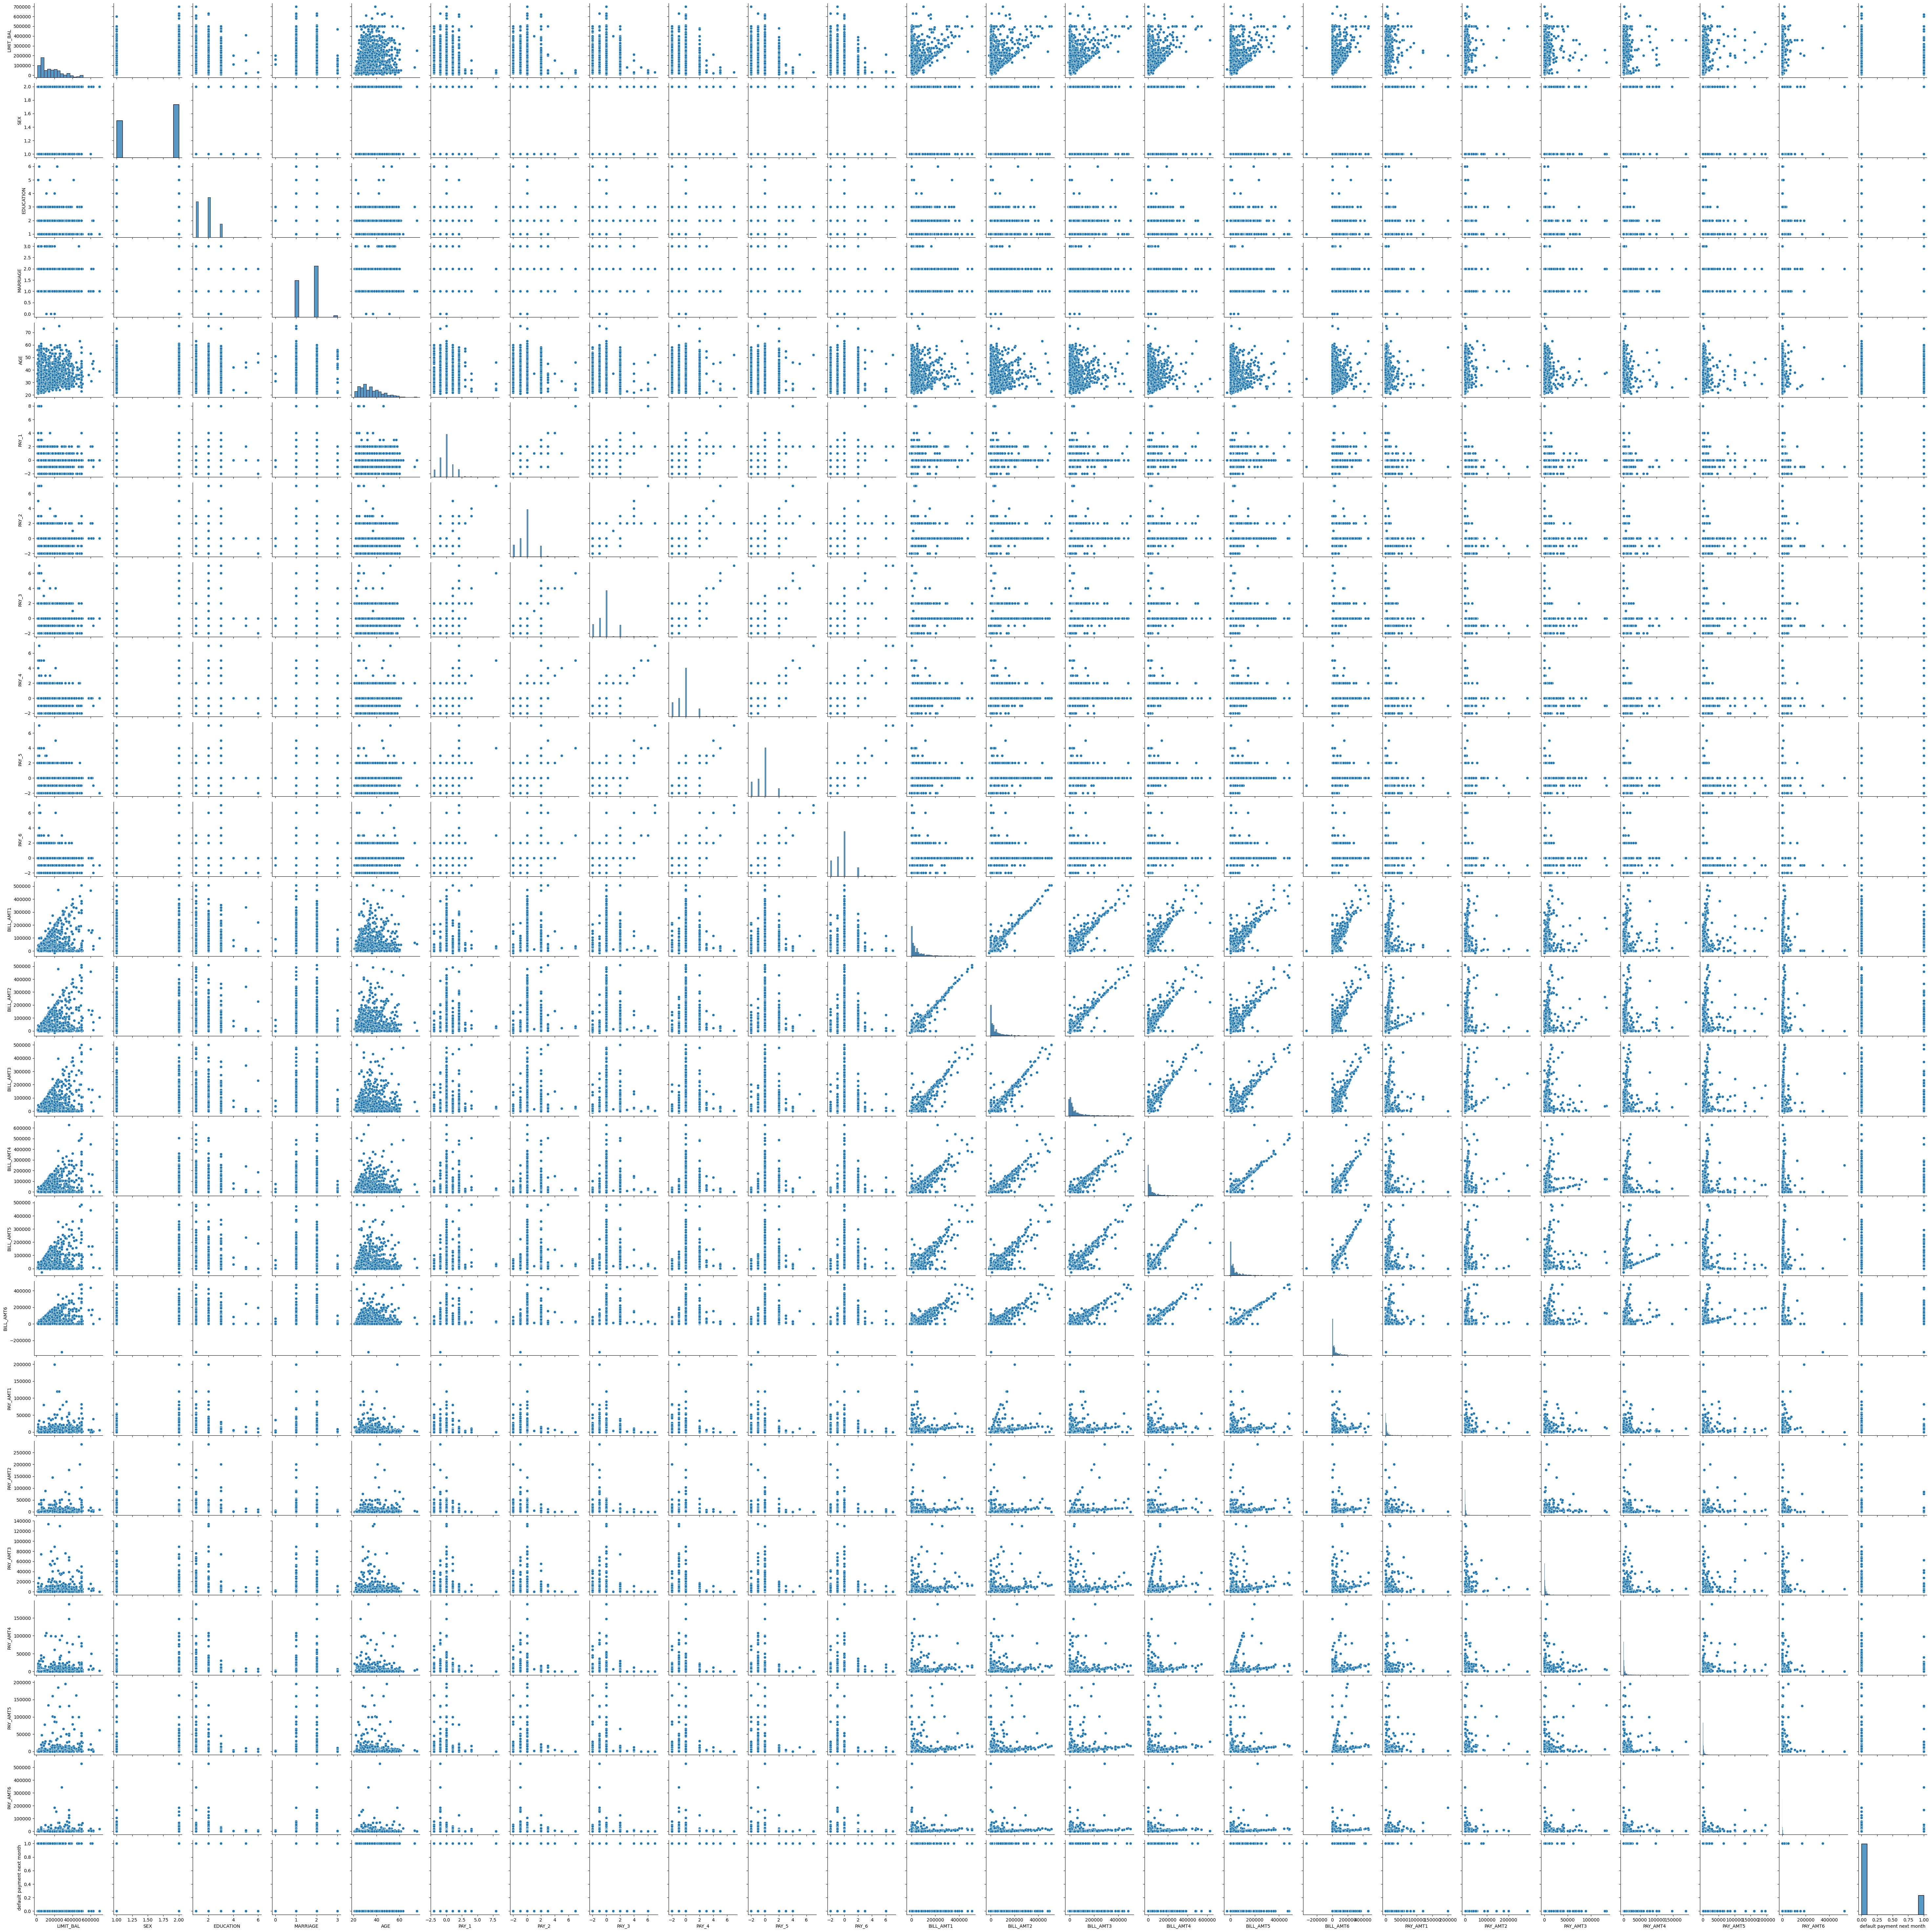

In [8]:
sns.pairplot(data)

From the pair-plot above, we can see that there is some relationship between the feature columns.
To confirm that we’d plot a correlation heatmap.


<Axes: >

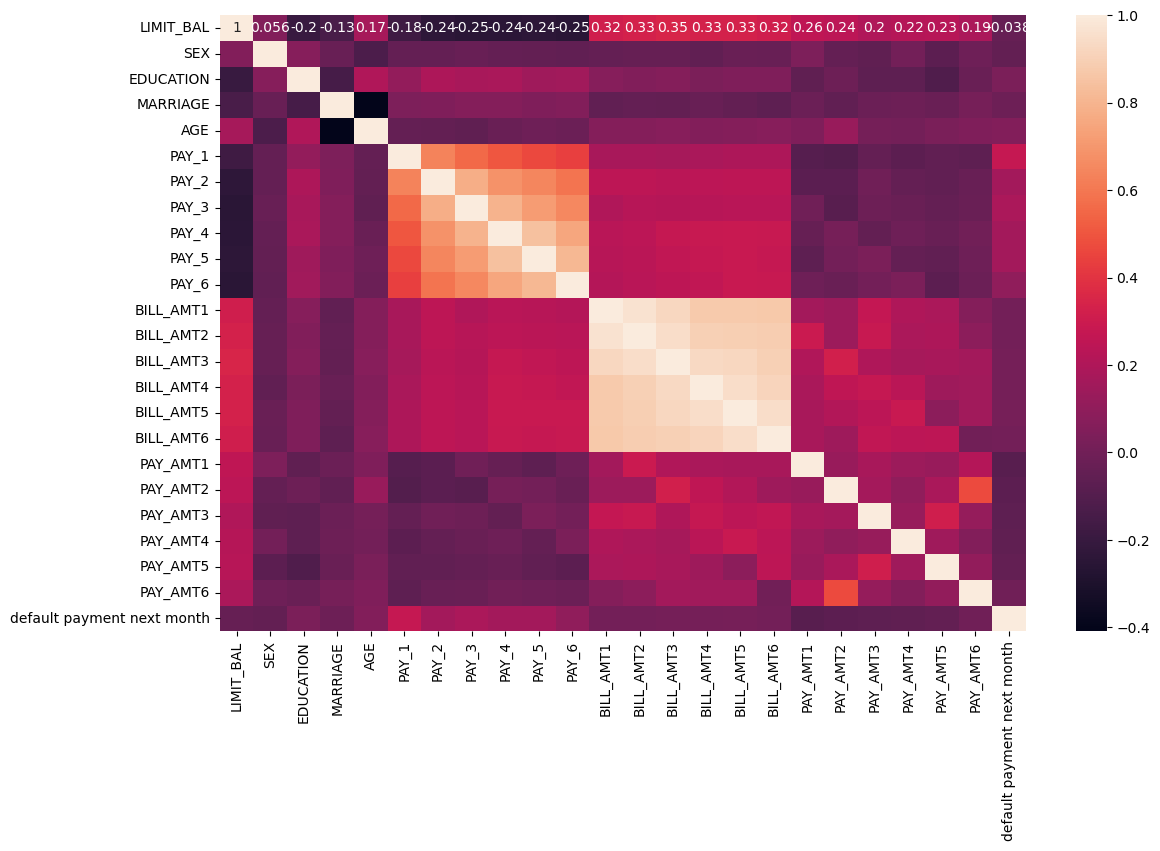

In [9]:
plt.figure(figsize=(13,8))
sns.heatmap(data.corr(), annot=True )

In [10]:
x=data.drop(labels=['default payment next month'],axis=1)
y=data['default payment next month']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
train_scaler=StandardScaler()
test_scaler=StandardScaler()

In [13]:
scaled_train_data=train_scaler.fit_transform(x_train)
scaled_test_data=test_scaler.fit_transform(x_test)

In [14]:
scaled_train_df=pd.DataFrame(data=scaled_train_data, columns=x_train.columns, index=x_train.index)

In [15]:
scaled_test_df=pd.DataFrame(data=scaled_test_data, columns=x_test.columns, index=x_test.index)

In [16]:
scaled_train_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
311,-0.827063,-1.187465,0.287024,0.730441,-1.282089,-0.031171,0.115654,0.105611,0.225653,0.220334,...,-0.176369,-0.360048,-0.340346,-0.309805,-0.305588,-0.184075,-0.348399,-0.294666,-0.195700,-0.177211
765,0.239455,0.842130,-1.030140,-1.151849,0.006733,-1.701941,-1.465732,-1.466817,-1.463595,-1.476489,...,-0.630462,-0.569559,-0.612888,-0.614997,-0.103300,-0.202343,-0.165886,-0.364653,-0.306803,-0.203779
630,-0.446164,-1.187465,1.604187,-1.151849,2.262170,-0.031171,0.115654,0.105611,0.225653,0.220334,...,-0.176218,-0.173591,-0.266578,-0.244778,-0.119159,-0.215453,-0.279526,-0.176838,-0.129149,0.010829
0,-0.903243,-1.187465,0.287024,-1.151849,2.369572,-0.866556,0.115654,-0.680603,0.225653,0.220334,...,-0.155442,-0.308208,-0.319868,-0.313196,-0.302945,1.718397,0.574694,0.413945,-0.268528,-0.174494
316,-0.446164,-1.187465,0.287024,0.730441,-0.637678,0.804214,1.697039,1.678039,0.225653,0.220334,...,0.065414,0.083910,0.119615,0.141737,-0.258893,-0.293788,-0.212424,-0.191632,-0.203810,-0.117521


In [17]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [18]:
pred_y=gnb.fit(scaled_train_df,y_train).predict(scaled_test_df)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
ac=accuracy_score(y_test, pred_y)
ac

0.676737160120846

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid = {"var_smoothing": [1e-9,0.1, 0.001, 0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]}
#Creating an object of the Grid Search class
grid = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5,  verbose=3)

In [23]:

#finding the best parameters
grid.fit(scaled_train_data, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV 1/5] END ...............var_smoothing=1e-09;, score=0.299 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-09;, score=0.769 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-09;, score=0.694 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-09;, score=0.679 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-09;, score=0.679 total time=   0.0s
[CV 1/5] END .................var_smoothing=0.1;, score=0.321 total time=   0.0s
[CV 2/5] END .................var_smoothing=0.1;, score=0.776 total time=   0.0s
[CV 3/5] END .................var_smoothing=0.1;, score=0.731 total time=   0.0s
[CV 4/5] END .................var_smoothing=0.1;, score=0.679 total time=   0.0s
[CV 5/5] END .................var_smoothing=0.1;, score=0.724 total time=   0.0s
[CV 1/5] END ...............var_smoothing=0.001;, score=0.299 total time=   0.0s
[CV 2/5] END ...............var_smoothing=0.001;

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 0.1, 0.001, 0.5, 0.05, 0.01,
                                           1e-08, 1e-07, 1e-06, 1e-10, 1e-11]},
             verbose=3)

In [24]:
grid.best_estimator_

GaussianNB(var_smoothing=0.5)

In [25]:
gnb_new=GaussianNB(var_smoothing=0.5)
pred_y_new=gnb_new.fit(scaled_train_df,y_train).predict(scaled_test_df)

In [26]:
ac_new=accuracy_score(y_test,pred_y_new)
ac_new

0.797583081570997

In [27]:
from xgboost import XGBClassifier

In [28]:
param_grid_xgboost = {

                "n_estimators": [50,100, 130],
                               "max_depth": range(3, 11, 1),
    "random_state":[0,50,100]
    

            }

# Creating an object of the Grid Search class
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid_xgboost, verbose=3,cv=5,n_jobs=-1)

In [29]:
grid.fit(scaled_train_df,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 11),
                         'n_estimators': [50, 100, 130],
                         'random_state': [0, 50, 100]},
             verbose=3)

In [30]:
grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [31]:
xgb_new=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [32]:
xgb_new = XGBClassifier(objective='binary:logistic', missing=np.nan)
pred_y_xgb_new = xgb_new.fit(scaled_train_df, y_train).predict(scaled_test_df)

In [33]:
ac_xgb_new=accuracy_score(y_test,pred_y_xgb_new)

In [34]:
ac_xgb_new

0.8066465256797583

In [35]:
scaled_test_df.iloc[0]

LIMIT_BAL    0.423044
SEX          0.819584
EDUCATION    0.321688
MARRIAGE     0.770517
AGE         -0.882724
PAY_1       -0.813823
PAY_2       -0.701530
PAY_3       -0.624297
PAY_4       -0.576872
PAY_5       -0.580787
PAY_6       -0.559100
BILL_AMT1   -0.689409
BILL_AMT2   -0.473207
BILL_AMT3   -0.643640
BILL_AMT4   -0.557563
BILL_AMT5   -0.638055
BILL_AMT6   -0.532242
PAY_AMT1     0.582925
PAY_AMT2    -0.498502
PAY_AMT3    -0.212935
PAY_AMT4    -0.346829
PAY_AMT5    -0.145885
PAY_AMT6     6.018542
Name: 521, dtype: float64

In [36]:
list(scaled_train_df.iloc[0])

[-0.827062759960096,
 -1.1874645015519594,
 0.287023669144815,
 0.7304408287205996,
 -1.2820887988972784,
 -0.031171076366311903,
 0.11565356242446977,
 0.10561081810588435,
 0.2256533388884303,
 0.22033367290025554,
 0.25177051253150246,
 -0.013534690177389903,
 -0.21818849323842882,
 -0.17636922488111553,
 -0.36004809289407913,
 -0.34034559857310076,
 -0.3098047264525562,
 -0.3055883876847106,
 -0.18407543364223197,
 -0.34839867966823873,
 -0.2946660392357685,
 -0.19569991087400734,
 -0.1772114655037813]

In [37]:
xgb_new.predict([[-0.827062759960096,
 -1.1874645015519594,
 0.287023669144815,
 0.7304408287205996,
 -1.2820887988972784,
 -0.031171076366311903,
 0.11565356242446977,
 0.10561081810588435,
 0.2256533388884303,
 0.22033367290025554,
 0.25177051253150246,
 -0.013534690177389903,
 -0.21818849323842882,
 -0.17636922488111553,
 -0.36004809289407913,
 -0.34034559857310076,
 -0.3098047264525562,
 -0.3055883876847106,
 -0.18407543364223197,
 -0.34839867966823873,
 -0.2946660392357685,
 -0.19569991087400734,
 -0.1772114655037813]])

array([1])

In [38]:
import pickle

# Save the model to a file
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_new, file)
print("Model saved successfully!")


Model saved successfully!
